In [1]:
import numpy as np
import os
import glob
import ntpath
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from PIL import Image
import glob


In [2]:
!cd ./data/ && rm *.csv

# Creamos los folds

In [3]:
images='ImagenesCarasRed'

def writeTrainingSetFold(name, startTest,finishTest):
    file_obj  = open("./training/training-fold-" +name + ".txt", "w") 
    for j in range(1,42):    
        for i in range(1,11): 
            if i < startTest or i >= finishTest:
                file_obj.write("../"+images+"/s"+str(j)+"/"+str(i)+".pgm, "+str(j)+",\n")
    file_obj.close()

def writeTestingSetFold(name,startTest,finishTest):
    file_obj  = open("./testing/testing-fold-" +name + ".txt", "w") 
    for j in range(1,42):    
        for i in range(1,11): 
            if i >= startTest and i < finishTest:
                file_obj.write("../"+images+"/s"+str(j)+"/"+str(i)+".pgm, "+str(j)+",\n")
    file_obj.close()


In [4]:
k = 5
imagesPerClass = 10
foldSize = 10/5

for i in range(1,11,2):
    j = int(i / 2)
    writeTrainingSetFold(str(j),i,i+2)
    writeTestingSetFold(str(j),i,i+2)    

In [5]:
! ls

data  graphs  testing  training  Untitled.ipynb


# Borramos la experimentacion previa:

In [6]:
! cd ./data && ls && rm *.csv

rm: cannot remove '*.csv': No such file or directory


In [7]:
def refreshResults(i):
    filename = "./data/metrics-"+str(i)+".csv"
    f = open(filename,"w+")
    f.write("k;alpha;averageAccurracy;averagePrecision;averageRecall;averageF1\n")
    f.close()
    
    
for i in range(0,5):
    refreshResults(i)

In [8]:
for i in range(0,5):
    for alpha in range(1,10,5):
        for k in range(1,10,3):
            training = "../experimentacion/training/training-fold-"+str(i)+".txt"
            testing = "../experimentacion/testing/testing-fold-"+str(i)+".txt"
            metrics = "../experimentacion/data/metrics-"+str(i)+".csv"
            output = "../experimentacion/data/output-"+str(i)+".csv"
            ! ../cmake-build-debug/caralibro -i  $training -q $testing -m 1 -o $output -metrics $metrics -k $k -alpha $alpha
            print("Done k: "+str(i)+" alpha: "+str(alpha)+", neighbours:"+str(k)+"")

Done k: 0 alpha: 1, neighbours:1
Done k: 0 alpha: 1, neighbours:4
Done k: 0 alpha: 1, neighbours:7
Done k: 0 alpha: 6, neighbours:1
Done k: 0 alpha: 6, neighbours:4
Done k: 0 alpha: 6, neighbours:7
Done k: 1 alpha: 1, neighbours:1
Done k: 1 alpha: 1, neighbours:4
Done k: 1 alpha: 1, neighbours:7
Done k: 1 alpha: 6, neighbours:1
Done k: 1 alpha: 6, neighbours:4
Done k: 1 alpha: 6, neighbours:7
Done k: 2 alpha: 1, neighbours:1
Done k: 2 alpha: 1, neighbours:4
Done k: 2 alpha: 1, neighbours:7
Done k: 2 alpha: 6, neighbours:1
Done k: 2 alpha: 6, neighbours:4
Done k: 2 alpha: 6, neighbours:7
Done k: 3 alpha: 1, neighbours:1
Done k: 3 alpha: 1, neighbours:4
Done k: 3 alpha: 1, neighbours:7
Done k: 3 alpha: 6, neighbours:1
Done k: 3 alpha: 6, neighbours:4
Done k: 3 alpha: 6, neighbours:7
Done k: 4 alpha: 1, neighbours:1
Done k: 4 alpha: 1, neighbours:4
Done k: 4 alpha: 1, neighbours:7
Done k: 4 alpha: 6, neighbours:1
Done k: 4 alpha: 6, neighbours:4
Done k: 4 alpha: 6, neighbours:7


In [17]:
frames = [ pd.read_csv("./data/metrics-"+str(i)+".csv", delimiter=";") for i in range(0,5) ]
result = pd.concat(frames)

frames[0][frames[0].alpha==1]

,k,alpha,averageAccurracy,averagePrecision,averageRecall,averageF1
0,1,1,0.957168,0.269164,0.121951,0.629810
1,4,1,0.956573,0.261789,0.109756,0.656562
2,7,1,0.956573,0.292683,0.109756,0.627846


In [18]:
def plotFrame(df,idx):
    for al in range(1,31,5):
        copydf = df[df.alpha == al]
        columns = [column for column in copydf.columns if column != 'alpha']
        newdf = copydf[columns]    
        ax = newdf.plot(x="k", logy=False)
        ax.set_ylabel("")
        ax.set_xlabel("Valor de K" )
        title = "Fold: "+str(idx) + ", Alpha: " +str(al)
        plt.title(title)
        plt.show()
#         plt.savefig("./graphs/"+title)

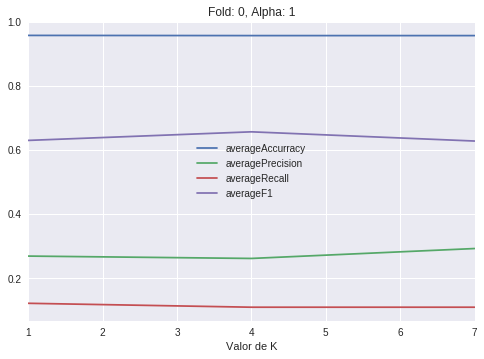

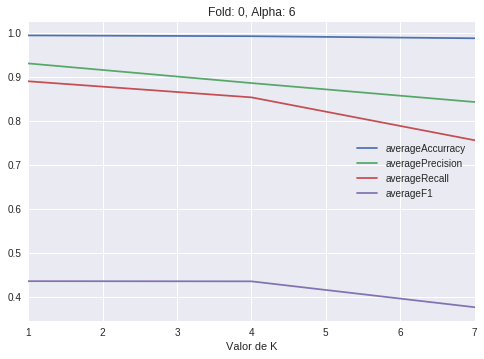

TypeError: Empty 'DataFrame': no numeric data to plot

In [19]:
for idx,frame in enumerate(frames):
    plotFrame(frame,idx)

In [83]:
resultgrouped = result.groupby(["alpha","k"]).mean() 

In [84]:
resultgrouped

averageAccurracy  averagePrecision  averageRecall  averageF1
alpha k                                                               
1     1           0.956811          0.247166       0.114634   0.681676
      4           0.957168          0.254390       0.121951   0.655163
      7           0.957168          0.298095       0.121951   0.628574
      10          0.956692          0.293507       0.112195   0.640120
      13          0.958001          0.372919       0.139024   0.553328
      16          0.958715          0.384994       0.153658   0.524594
      19          0.957763          0.389210       0.134146   0.520676
      22          0.958358          0.438612       0.146341   0.455412
      25          0.958358          0.445850       0.146342   0.451107
      28          0.957406          0.475867       0.126829   0.420730
      31          0.958120          0.496330       0.141463   0.398569
      34          0.957406          0.489714       0.126829   0.416379
      37          0.957168          0.515515       0.121951   0.395029
6     1           0.993932          0.916992       0.875610   0.439686
      4           0.991909          0.883333       0.834147   0.416504
      7           0.987270          0.819756       0.739024   0.381789
      10          0.985366          0.780813       0.700000   0.380256
      13          0.982629          0.737724       0.643903   0.379442
      16          0.980845          0.712126       0.607317   0.372327
      19          0.980369          0.724239       0.597561   0.351374
      22          0.979774          0.716341       0.585366   0.358339
      25          0.979893          0.724251       0.587805   0.350043
      28          0.978703          0.694413       0.563415   0.368684
      31          0.978465          0.700677       0.558537   0.367681
      34          0.978465          0.700933       0.558536   0.366175
      37          0.978584          0.709741       0.560976   0.358572
11    1           0.998096          0.974797       0.960976   0.476911
      4           0.995479          0.936585       0.907317   0.444715
      7           0.992623          0.895447       0.848781   0.423101
      10          0.990244          0.856098       0.800000   0.415018
...                    ...               ...            ...        ...
21    28          0.985604          0.818873       0.704878   0.371020
      31          0.986437          0.835633       0.721951   0.367615
      34          0.985604          0.807270       0.704878   0.373682
      37          0.986675          0.820569       0.726829   0.380755
26    1           0.998572          0.982114       0.970732   0.483903
      4           0.996788          0.955285       0.934146   0.463577
      7           0.993932          0.910894       0.875610   0.435540
      10          0.992029          0.886829       0.836585   0.427340
      13          0.990482          0.873496       0.804878   0.402288
      16          0.988935          0.861870       0.773171   0.379884
      19          0.987150          0.828223       0.736585   0.376345
      22          0.987269          0.834797       0.739025   0.373496
      25          0.986437          0.829442       0.721951   0.373012
      28          0.986199          0.817573       0.717073   0.386032
      31          0.986437          0.818804       0.721951   0.383724
      34          0.987031          0.826624       0.734146   0.386059
      37          0.987270          0.828169       0.739024   0.382749
31    1           0.998572          0.982114       0.970732   0.483903
      4           0.997144          0.961789       0.941464   0.467561
      7           0.994408          0.920650       0.885366   0.439605
      10          0.992148          0.888455       0.839024   0.421731
      13          0.990839          0.878699       0.812195   0.406934
      16          0.988697          0.843415       0.768293   0.397631
      19          0.987864        

# Miremos cuánto tarda entrenar con PCA con Knn

In [122]:
! cd ./data && ls && rm time.csv
def refreshResults(i):
    filename = "./data/time-"+str(i)+".csv"
    f = open(filename,"w+")
    f.write("mode;k;alpha;Training Time;Evaluation Time\n")
    f.close()
refreshResults(1)

metrics.csv   output.csv     results-1.csv  results-3.csv  results.csv
output-1.csv  results-0.csv  results-2.csv  results-4.csv  time-1.csv
rm: cannot remove 'time.csv': No such file or directory


In [31]:

for alpha in range(1,644,20):
    training = "../experimentacion/training/training-fold-"+str(1)+".txt"
    testing = "../experimentacion/testing/testing-fold-"+str(1)+".txt"
    metrics = "../experimentacion/data/metrics-"+str(1)+".csv"
    output = "../experimentacion/data/output-"+str(1)+".csv"
    time = "../experimentacion/data/time-"+str(1)+".csv"
    ! ../cmake-build-debug/caralibro -i  $training -q $testing -m 1 -o $output -alpha $alpha -time $time 
            

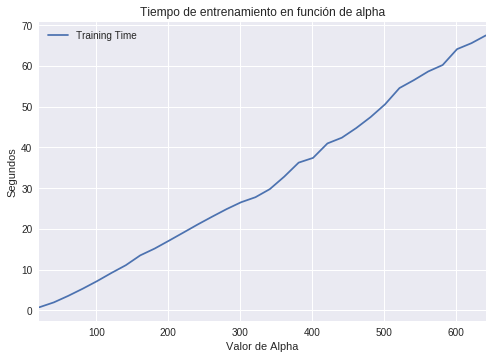

In [36]:
df = pd.read_csv("./data/time-1.csv", delimiter = ";")
copydf = df
columns = [column for column in copydf.columns if column == 'alpha' or column == 'Training Time']
newdf = copydf[columns]    
ax = newdf.plot(x="alpha", logy=False)
ax.set_ylabel("Segundos")
ax.set_xlabel("Valor de Alpha" )
title = "Tiempo de entrenamiento en función de alpha"
plt.title(title)
plt.show()
plt.savefig("./graphs/"+title)


# Miremos como aumenta el tiempo de evaluacion en función de los pixels

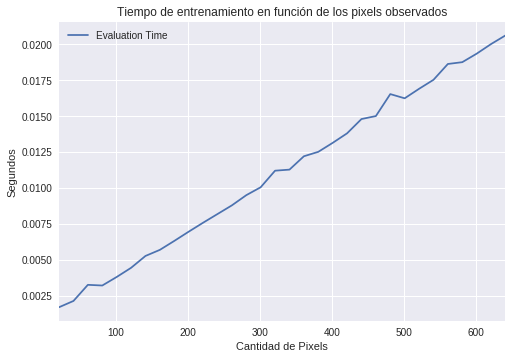

In [38]:
df = pd.read_csv("./data/time-1.csv", delimiter = ";")
copydf = df
columns = [column for column in copydf.columns if column == 'alpha' or column == 'Evaluation Time']
newdf = copydf[columns]    
ax = newdf.plot(x="alpha", logy=False)
ax.set_ylabel("Segundos")
ax.set_xlabel("Cantidad de Pixels" )
title = "Tiempo de entrenamiento en función de los pixels observados"
plt.title(title)
plt.show()
plt.savefig("./graphs/"+title)
